<a href="https://colab.research.google.com/github/YuvrajRakheja/Predicting-Business-License-Status/blob/main/Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset from Drive





In [ ]:
!wget https://github.com/yuvraj51/Hackathon/raw/main/drive-download-20220316T145053Z-001.zip
!unzip /content/drive-download-20220316T145053Z-001.zip

--2022-03-16 20:59:35--  https://github.com/yuvraj51/Hackathon/raw/main/drive-download-20220316T145053Z-001.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yuvraj51/Hackathon/main/drive-download-20220316T145053Z-001.zip [following]
--2022-03-16 20:59:36--  https://raw.githubusercontent.com/yuvraj51/Hackathon/main/drive-download-20220316T145053Z-001.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15134830 (14M) [application/zip]
Saving to: ‘drive-download-20220316T145053Z-001.zip.5’

drive-download-2022 100%[===================>]  14.43M  --.-KB/s    in 0.08s   

2022-03-16 20:59:36 (175 

In [ ]:
train = pd.read_csv("/content/train_file.csv")
train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [ ]:
train.shape

(85895, 32)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [ ]:
train.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [ ]:
train.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [ ]:
test = pd.read_csv("test_file.csv")
test.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [ ]:
test.shape

(57239, 31)

In [ ]:
test.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,5.723900e+04,57239.000000,57239.000000,57227.000000,56613.000000,55661.000000,55764.00000,57239.000000,5.723900e+04,15908.000000,56329.000000,56329.000000
mean,1.867003e+06,187884.083719,4.518685,60580.682982,28.072987,27.203105,13.16369,1243.865197,1.208141e+06,29.852653,41.879834,-87.678037
std,3.788378e+05,139139.743948,19.860738,2088.082252,14.587923,20.639461,7.11839,683.092249,8.530084e+05,17.447423,0.078721,0.055403
min,9.803000e+03,10.000000,1.000000,1830.000000,1.000000,1.000000,0.00000,1002.000000,4.300000e+01,1.000000,41.644712,-87.933977
25%,1.553288e+06,41316.000000,1.000000,60612.000000,16.000000,12.000000,8.00000,1010.000000,6.149350e+04,17.000000,41.834519,-87.713276
50%,1.912282e+06,222091.000000,1.000000,60624.000000,30.000000,26.000000,14.00000,1010.000000,1.473632e+06,29.000000,41.891538,-87.669686
75%,2.137864e+06,312884.000000,2.000000,60641.000000,42.000000,41.000000,18.00000,1275.000000,1.928348e+06,43.000000,41.938297,-87.635921
max,2.615886e+06,429413.000000,507.000000,98003.000000,50.000000,999.000000,25.00000,8344.000000,2.615886e+06,69.000000,42.022630,-87.525872


In [ ]:
test.isna().sum()
#checking for null data

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [ ]:
train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

In [ ]:
my_submission = pd.DataFrame({'ID': test.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


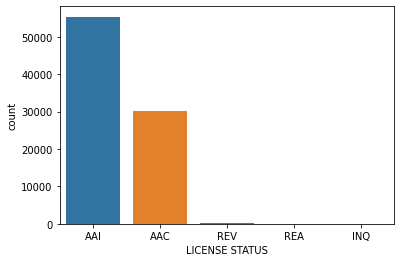

In [ ]:
sns.countplot(train['LICENSE STATUS'])
plt.show()
#DATA VISUALIZATION

Dropping unnecessary info

In [ ]:
my_submission.shape

(57239, 1)

In [ ]:
col_list = ['APPLICATION CREATED DATE', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION','LICENSE STATUS CHANGE DATE','STATE','LICENSE NUMBER','WARD PRECINCT','LATITUDE','LONGITUDE']

In [ ]:
train=train.drop(col_list, axis=1)
test=test.drop(col_list, axis=1)

In [ ]:
train.isna().sum()

ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
CITY                                     0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
SSA                                  76446
LICENSE STATUS                           0
dtype: int64

In [ ]:
train.shape

(85895, 21)

In [ ]:
test.shape

(57239, 20)

In [ ]:
train['LICENSE STATUS'].value_counts()


AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

CONVERTING COLUMN IN TRAIN HAVING DATE WHICH IS IN OBJECT TO DATE TIME FORMAT

In [ ]:
train['PAYMENT DATE'] = pd.to_datetime(train['PAYMENT DATE'])

In [ ]:
train['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(train['APPLICATION REQUIREMENTS COMPLETE'])
train['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(train['LICENSE TERM EXPIRATION DATE'])


In [ ]:
train['LICENSE TERM START DATE'] = pd.to_datetime(train['LICENSE TERM START DATE'])
train['DATE ISSUED'] = pd.to_datetime(train['DATE ISSUED'])

In [ ]:
train['APPLICATION REQUIREMENTS COMPLETE']

0       2002-06-28
1       2005-09-22
2       2009-07-22
3       2004-02-10
4       2008-03-24
           ...    
85890   2012-03-15
85891   2007-05-22
85892   2008-11-14
85893   2011-08-15
85894   2003-12-15
Name: APPLICATION REQUIREMENTS COMPLETE, Length: 85895, dtype: datetime64[ns]

In [ ]:
train['LICENSE APPROVED FOR ISSUANCE']=train['LICENSE APPROVED FOR ISSUANCE'].replace(['2008-10-31T0'],'2002-08-21T00:00:00')

In [ ]:
train['LICENSE APPROVED FOR ISSUANCE']=pd.to_datetime(train['LICENSE APPROVED FOR ISSUANCE'])

CONVERTING COLUMN IN TEST HAVING DATE WHICH IS IN OBJECT TO DATE TIME FORMAT

In [ ]:
test['PAYMENT DATE'] = pd.to_datetime(test['PAYMENT DATE'])
test['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(test['APPLICATION REQUIREMENTS COMPLETE'])
test['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(test['LICENSE TERM EXPIRATION DATE'])
test['LICENSE TERM START DATE'] = pd.to_datetime(test['LICENSE TERM START DATE'])
test['DATE ISSUED'] = pd.to_datetime(test['DATE ISSUED'])
test['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(test['LICENSE APPROVED FOR ISSUANCE'])

NOW APPLYING LAMBDA(ANONYMOUS ONE TIME EXECUTABLE)FUNCTION

In [ ]:
train['PAYMENT YEAR'] = train['PAYMENT DATE'].apply(lambda x: x.year)
test['PAYMENT YEAR'] = test['PAYMENT DATE'].apply(lambda x: x.year)

In [ ]:
train['APPLICATION REQUIREMENTS COMPLETE YEAR']=train['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)
test['APPLICATION REQUIREMENTS COMPLETE YEAR']=test['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [ ]:
train['DATE ISSUED YEAR']=train['DATE ISSUED'].apply(lambda x: x.year)
test['DATE ISSUED YEAR']=test['DATE ISSUED'].apply(lambda x: x.year)

In [ ]:
train['LICENSE TERM EXPIRATION YEAR']=train['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
test['LICENSE TERM EXPIRATION YEAR']=test['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)


In [ ]:
train['LICENSE TERM START YEAR'] = train['LICENSE TERM START DATE'].apply(lambda x: x.year)
test['LICENSE TERM START YEAR'] = test['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [ ]:
train['LICENSE VALIDITY']=abs(train['LICENSE TERM EXPIRATION YEAR'] - train['LICENSE TERM START YEAR'])
test['LICENSE VALIDITY']=abs(test['LICENSE TERM EXPIRATION YEAR'] - test['LICENSE TERM START YEAR'])

In [ ]:
train['LICENSE APPROVED YEAR']=train['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [ ]:
test['LICENSE APPROVED YEAR']=test['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [ ]:
train=train.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)
test=test.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [ ]:
train=train.drop(['DATE ISSUED'], axis = 1)
test=test.drop(['DATE ISSUED'], axis = 1)

In [ ]:
train=train.drop(['PAYMENT DATE'], axis = 1)
test=test.drop(['PAYMENT DATE'], axis = 1)

In [ ]:
train=train.drop(['LICENSE TERM EXPIRATION DATE'], axis=1)
test=test.drop(['LICENSE TERM EXPIRATION DATE'], axis=1)
train=train.drop(['LICENSE TERM START DATE'], axis=1)
test=test.drop(['LICENSE TERM START DATE'], axis=1)

In [ ]:
train.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE APPROVED FOR ISSUANCE,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,2002-08-21,25.0,AAI,2002.0,2002.0,2006,2003.0,2002.0,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,2006-04-05,60.0,AAC,2005.0,2005.0,2006,2006.0,2005.0,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,2009-07-22,NaN,AAI,2009.0,2009.0,2009,2011.0,2009.0,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,2004-02-10,NaN,AAI,2004.0,2004.0,2004,2005.0,2004.0,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,2008-06-04,NaN,AAI,2008.0,2008.0,2008,2010.0,2008.0,2.0,2008.0


In [ ]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LICENSE APPROVED FOR ISSUANCE              6789
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                               1289
APPLICATION REQUIREMENTS COMPLETE YEAR      214
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                 18
LICENSE TERM START YEAR                 

In [ ]:
test.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        2
CITY                                          0
ZIP CODE                                     12
WARD                                        626
PRECINCT                                   1578
POLICE DISTRICT                            1475
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LICENSE APPROVED FOR ISSUANCE              2379
SSA                                       41331
PAYMENT YEAR                               1051
APPLICATION REQUIREMENTS COMPLETE YEAR      428
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                  6
LICENSE TERM START YEAR                     118
LICENSE VALIDITY                        

In [ ]:
train['DOING BUSINESS AS NAME']=train['DOING BUSINESS AS NAME'].fillna('None')
test['DOING BUSINESS AS NAME']=test['DOING BUSINESS AS NAME'].fillna('None')

In [ ]:
train['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test['LEGAL NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                       CSX INTERMODAL INC
2                    LOCOMIBILE  LOFTS LLC
3                          ANNA F. JAMISON
4                   MARINCA A. COVARRUBIAS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                        INTERPARK LLC
57236                        YUN HEE HWANG
57237         D. C. A. TOWING INCORPORATED
57238                        MARIA T BEDOY
Name: LEGAL NAME, Length: 57239, dtype: object

In [ ]:
test['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test['LEGAL NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                       CSX INTERMODAL INC
2                    LOCOMIBILE  LOFTS LLC
3                          ANNA F. JAMISON
4                   MARINCA A. COVARRUBIAS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                        INTERPARK LLC
57236                        YUN HEE HWANG
57237         D. C. A. TOWING INCORPORATED
57238                        MARIA T BEDOY
Name: LEGAL NAME, Length: 57239, dtype: object

In [ ]:
train['LEGAL NAME'].value_counts()

WASTE MANAGEMENT OF ILLINOIS INC.         689
GROOT RECYCLING & WASTE SERVICES, INC.    164
SUPREME  CATERING COMPANY                  94
STARBUCKS CORPORATION                      87
ALLIED WASTE TRANSPORTATION INC.           82
                                         ... 
THOMAS MANAGEMENT ASSOCIATE                 1
P R S CONSTRUCTION, INC.                    1
CARNICERIA LA GLORIA NO 2, INC.             1
ELEUTERIO PEREZ                             1
JOSEPH M MINICK                             1
Name: LEGAL NAME, Length: 38744, dtype: int64

In [ ]:
train['LEGAL NAME']=train['LEGAL NAME'].str.replace('.', '', regex=False)
train['DOING BUSINESS AS NAME']=train['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [ ]:
test['LEGAL NAME']=test['LEGAL NAME'].str.replace('.', '', regex=False)
test['DOING BUSINESS AS NAME']=test['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [ ]:
train['LICENSE DESCRIPTION'].unique()

array(['Limited Business License', 'Mobile Food Dispenser', 'Home Repair',
       'Motor Vehicle Repair : Engine Only (Class II)',
       'Kennels and Catteries', 'Hazardous Materials',
       'Retail Food Establishment', 'Automatic Amusement Device Operator',
       'Home Occupation', 'Peddler, food (fruits and vegtables only)',
       'Music and Dance', 'Street Performer', 'Peddler, non-food',
       'Body Piercing', 'Massage Therapist', 'Veterinary Hospital',
       'Auctioneer', 'Broker', 'Residential Real Estate Developer',
       'Electronic Equipment Repair', 'Filling Station',
       'Valet Parking Operator', 'Scavenger, Private',
       'Repossessor Class B Employee', 'Tavern',
       'Mobile Frozen Desserts Dispenser - Non-Motorized',
       'Peddler,food - (fruits and vegetables only) - special',
       'Peddler, non-food, special', 'Grooming Facility', 'Package Goods',
       'Motor Vehicle Repair; Specialty(Class I)',
       'Retail Computing Center',
       'Consumption o

In [ ]:
test['LICENSE DESCRIPTION'].unique()

array(['Residential Real Estate Developer', 'Limited Business License',
       'Peddler, non-food, special', 'Hazardous Materials', 'Home Repair',
       'Secondhand Dealer',
       'Motor Vehicle Repair : Engine Only (Class II)',
       'Commercial Garage', 'Day Care Center Under 2 and 2 - 6 Years',
       'Peddler, non-food', 'Explosives, Certificate of Fitness',
       'Peddler,food - (fruits and vegetables only) - special',
       'Valet Parking Operator', 'Regulated Business License',
       'Kennels and Catteries', 'Broker', 'Home Occupation',
       'Manufacturing Establishments', 'Tobacco',
       'Retail Food Establishment', 'Hotel', 'Public Place of Amusement',
       'Motor Vehicle Repair: Engine/Body(Class III)', 'Board-Up Work',
       'Long-Term Care Facility', 'Veterinary Hospital',
       'Day Care Center 2 - 6 Years', 'Scavenger, Private',
       'Mobile Food Dispenser', 'Electronic Equipment Repair', 'Tavern',
       'Shared Housing Unit Operator',
       'Mobile Froz

Making description smaller to make more readable

In [ ]:
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train['LICENSE DESCRIPTION']=train['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train['LICENSE DESCRIPTION'].value_counts()


Limited Business License                                        50078
Home Repair                                                     10633
Peddler                                                          3782
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1952
Street Performer                                                 1889
Scavenger, Private                                               1549
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Automatic Amusement Device Operator                               773
Mobile Food Dispenser                                             525
Day Care Center                                                   522
Manufacturing Establ

In [ ]:
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test['LICENSE DESCRIPTION']=test['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test['LICENSE DESCRIPTION'].value_counts()


Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498
Residential Real Est

In [ ]:
train['APPLICATION TYPE'].value_counts()

RENEW     61085
ISSUE     23398
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: APPLICATION TYPE, dtype: int64

In [ ]:
train['CONDITIONAL APPROVAL'].value_counts()

N    85877
Y       18
Name: CONDITIONAL APPROVAL, dtype: int64

In [ ]:
train.dtypes

ACCOUNT NUMBER                                     int64
SITE NUMBER                                        int64
LEGAL NAME                                        object
DOING BUSINESS AS NAME                            object
CITY                                              object
ZIP CODE                                          object
WARD                                             float64
PRECINCT                                         float64
POLICE DISTRICT                                  float64
LICENSE CODE                                       int64
LICENSE DESCRIPTION                               object
APPLICATION TYPE                                  object
CONDITIONAL APPROVAL                              object
LICENSE APPROVED FOR ISSUANCE             datetime64[ns]
SSA                                              float64
LICENSE STATUS                                    object
PAYMENT YEAR                                     float64
APPLICATION REQUIREMENTS COMPLE

In [ ]:
train['ZIP CODE'].isna().sum()

31

In [ ]:
train['ZIP CODE']=train['ZIP CODE'].fillna('None')
test['ZIP CODE']=test['ZIP CODE'].fillna('None')

In [ ]:
train['WARD']=train['WARD'].fillna(0)
test['WARD']=test['WARD'].fillna(0)

In [ ]:
train['PRECINCT']=train['PRECINCT'].fillna(0)
test['PRECINCT']=test['PRECINCT'].fillna(0)

In [ ]:
train['POLICE DISTRICT']=train['POLICE DISTRICT'].fillna(0)
test['POLICE DISTRICT']=test['POLICE DISTRICT'].fillna(0)

In [ ]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LICENSE APPROVED FOR ISSUANCE              6789
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                               1289
APPLICATION REQUIREMENTS COMPLETE YEAR      214
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                 18
LICENSE TERM START YEAR                 

In [ ]:
train['PAYMENT YEAR']=train['PAYMENT YEAR'].fillna(round(train['PAYMENT YEAR'].mean()))
test['PAYMENT YEAR']=test['PAYMENT YEAR'].fillna(round(test['PAYMENT YEAR'].mean()))
train['LICENSE APPROVED YEAR']=train['LICENSE APPROVED YEAR'].fillna(round(train['LICENSE APPROVED YEAR'].mean()))
test['LICENSE APPROVED YEAR']=test['LICENSE APPROVED YEAR'].fillna(round(test['LICENSE APPROVED YEAR'].mean()))
train['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(train['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))
test['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(test['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))



In [ ]:
train.isna().sum()


ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LICENSE APPROVED FOR ISSUANCE              6789
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                                  0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                 18
LICENSE TERM START YEAR                 

In [ ]:
train['LEGAL TYPE']='PVT'

In [ ]:
test['LEGAL TYPE'] = 'PVT'

In [ ]:
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('INC'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train['LEGAL TYPE'])


In [ ]:
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('INC'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test['LEGAL TYPE'])




In [ ]:
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('LLC'), 'LLC', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train['LEGAL TYPE'])

In [ ]:
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('LLC'), 'LLC', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test['LEGAL TYPE'])

In [ ]:
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('CO'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('CORP'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train['LEGAL TYPE'])
train['LEGAL TYPE']=np.where(train['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train['LEGAL TYPE'])

In [ ]:
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('CO'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('CORP'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test['LEGAL TYPE'])


In [ ]:
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('LTD'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train['LEGAL TYPE'])
train['LEGAL TYPE'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train['LEGAL TYPE'])
train.head()



,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE APPROVED FOR ISSUANCE,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,2002-08-21,25.0,AAI,2002.0,2002.0,2006,2003.0,2002.0,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,2006-04-05,60.0,AAC,2005.0,2005.0,2006,2006.0,2005.0,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,0.0,0.0,0.0,1011,Home Repair,ISSUE,N,2009-07-22,NaN,AAI,2009.0,2009.0,2009,2011.0,2009.0,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,0.0,0.0,0.0,1010,Limited Business License,ISSUE,N,2004-02-10,NaN,AAI,2004.0,2004.0,2004,2005.0,2004.0,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,0.0,0.0,0.0,1010,Limited Business License,RENEW,N,2008-06-04,NaN,AAI,2008.0,2008.0,2008,2010.0,2008.0,2.0,2008.0,PVT


In [ ]:
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('LTD'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test['LEGAL TYPE'])
test['LEGAL TYPE']=np.where(test['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test['LEGAL TYPE'])
test.head()


,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,LICENSE APPROVED FOR ISSUANCE,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,2012-01-19,NaN,2012.0,2011.0,2012,2014.0,2012.0,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,2012-11-02,NaN,2012.0,2011.0,2012,2013.0,2011.0,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,2004-12-06,NaN,2004.0,2004.0,2004,2005.0,2004.0,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,Peddler,RENEW,N,NaT,NaN,2010.0,2010.0,2010,2012.0,2010.0,2.0,2008.0,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,2007-08-15,39.0,2007.0,2007.0,2007,2009.0,2007.0,2.0,2007.0,CORP


In [ ]:
train['LEGAL TYPE'].value_counts()

CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: LEGAL TYPE, dtype: int64

In [ ]:
train=train.drop(['LEGAL NAME'], axis = 1)
train=train.drop(['DOING BUSINESS AS NAME'], axis = 1)
test=test.drop(['LEGAL NAME'], axis = 1)
test=test.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [ ]:
test.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
LICENSE APPROVED FOR ISSUANCE              2379
SSA                                       41331
PAYMENT YEAR                                  0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                  6
LICENSE TERM START YEAR                     118
LICENSE VALIDITY                            118
LICENSE APPROVED YEAR                         0
LEGAL TYPE                              

In [ ]:
train=train.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)
test=test.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [ ]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                                  0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
DATE ISSUED YEAR                              0
LICENSE TERM EXPIRATION YEAR                 18
LICENSE TERM START YEAR                     228
LICENSE VALIDITY                            228
LICENSE APPROVED YEAR                         0
LEGAL TYPE                              

In [ ]:
train=train.drop(['LICENSE TERM EXPIRATION YEAR'], axis=1)
test=test.drop(['LICENSE TERM EXPIRATION YEAR'], axis=1)
train=train.drop(['LICENSE TERM START YEAR'], axis=1)
test=test.drop(['LICENSE TERM START YEAR'], axis=1)

In [ ]:
train['LICENSE VALIDITY']=train['LICENSE VALIDITY'].fillna(method='ffill')
test['LICENSE VALIDITY']=test['LICENSE VALIDITY'].fillna(method='ffill')

In [ ]:
train.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       76446
LICENSE STATUS                                0
PAYMENT YEAR                                  0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
DATE ISSUED YEAR                              0
LICENSE VALIDITY                              0
LICENSE APPROVED YEAR                         0
LEGAL TYPE                                    0
dtype: int64

In [ ]:
test.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                      0
WARD                                          0
PRECINCT                                      0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       41331
PAYMENT YEAR                                  0
APPLICATION REQUIREMENTS COMPLETE YEAR        0
DATE ISSUED YEAR                              0
LICENSE VALIDITY                              0
LICENSE APPROVED YEAR                         0
LEGAL TYPE                                    0
dtype: int64

In [ ]:
train['SSA']=train['SSA'].fillna(0)
test['SSA']=test['SSA'].fillna(0)

In [ ]:
train.shape

(85895, 19)

In [ ]:
test.shape

(57239, 18)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   CITY                                    85895 non-null  object 
 3   ZIP CODE                                85895 non-null  object 
 4   WARD                                    85895 non-null  float64
 5   PRECINCT                                85895 non-null  float64
 6   POLICE DISTRICT                         85895 non-null  float64
 7   LICENSE CODE                            85895 non-null  int64  
 8   LICENSE DESCRIPTION                     85895 non-null  object 
 9   APPLICATION TYPE                        85895 non-null  object 
 10  CONDITIONAL APPROVAL                    85895 non-null  ob

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          57239 non-null  int64  
 1   SITE NUMBER                             57239 non-null  int64  
 2   CITY                                    57239 non-null  object 
 3   ZIP CODE                                57239 non-null  object 
 4   WARD                                    57239 non-null  float64
 5   PRECINCT                                57239 non-null  float64
 6   POLICE DISTRICT                         57239 non-null  float64
 7   LICENSE CODE                            57239 non-null  int64  
 8   LICENSE DESCRIPTION                     57239 non-null  object 
 9   APPLICATION TYPE                        57239 non-null  object 
 10  CONDITIONAL APPROVAL                    57239 non-null  ob

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["CITY"]=encoder.fit_transform(train["CITY"])
train["ZIP CODE"]=encoder.fit_transform(train["ZIP CODE"].astype(str))
train["LICENSE DESCRIPTION"]=encoder.fit_transform(train["LICENSE DESCRIPTION"])
train["APPLICATION TYPE"]=encoder.fit_transform(train["APPLICATION TYPE"])
train["CONDITIONAL APPROVAL"]=encoder.fit_transform(train["CONDITIONAL APPROVAL"])
train["LEGAL TYPE"]=encoder.fit_transform(train["LEGAL TYPE"])
train.head()



,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,193,1559,22.0,28.0,10.0,1010,41,4,0,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,4
1,262311,29,193,1548,33.0,23.0,17.0,1315,46,4,0,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,1
2,345008,1,466,1025,0.0,0.0,0.0,1011,30,3,0,0.0,AAI,2009.0,2009.0,2009,2.0,2009.0,1
3,273121,1,585,1329,0.0,0.0,0.0,1010,41,3,0,0.0,AAI,2004.0,2004.0,2004,1.0,2004.0,0
4,213785,1,1145,1095,0.0,0.0,0.0,1010,41,4,0,0.0,AAI,2008.0,2008.0,2008,2.0,2008.0,4


In [ ]:
train["LICENSE STATUS"].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [ ]:
train["LICENSE STATUS"]=train["LICENSE STATUS"].replace('AAI', 0)
train["LICENSE STATUS"]=train["LICENSE STATUS"].replace('AAC', 1)
train["LICENSE STATUS"]=train["LICENSE STATUS"].replace('REV', 2)
train["LICENSE STATUS"]=train["LICENSE STATUS"].replace('REA', 3)
train["LICENSE STATUS"]=train["LICENSE STATUS"].replace('INQ', 4)

In [ ]:
encoder = LabelEncoder()
test["CITY"]=encoder.fit_transform(test["CITY"])
test["ZIP CODE"]=encoder.fit_transform(test["ZIP CODE"].astype(str))
test["LICENSE DESCRIPTION"]=encoder.fit_transform(test["LICENSE DESCRIPTION"])
test["APPLICATION TYPE"]=encoder.fit_transform(test["APPLICATION TYPE"])
test["CONDITIONAL APPROVAL"]=encoder.fit_transform(test["CONDITIONAL APPROVAL"])
test["LEGAL TYPE"]=encoder.fit_transform(test["LEGAL TYPE"])
test.head()



,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,59,255,42.0,67.0,18.0,1020,82,5,0,0.0,2012.0,2011.0,2012,2.0,2012.0,2
1,65043,1,59,280,16.0,5.0,7.0,1010,48,5,0,0.0,2012.0,2011.0,2012,2.0,2012.0,1
2,281270,1,59,250,4.0,8.0,1.0,1020,82,5,0,0.0,2004.0,2004.0,2004,1.0,2004.0,0
3,335243,1,59,311,9.0,33.0,5.0,1607,70,5,0,0.0,2010.0,2010.0,2010,2.0,2008.0,4
4,283018,3,59,276,15.0,26.0,9.0,1010,48,5,0,39.0,2007.0,2007.0,2007,2.0,2007.0,0


In [ ]:
corr = train.corr()
corr.shape

(19, 19)

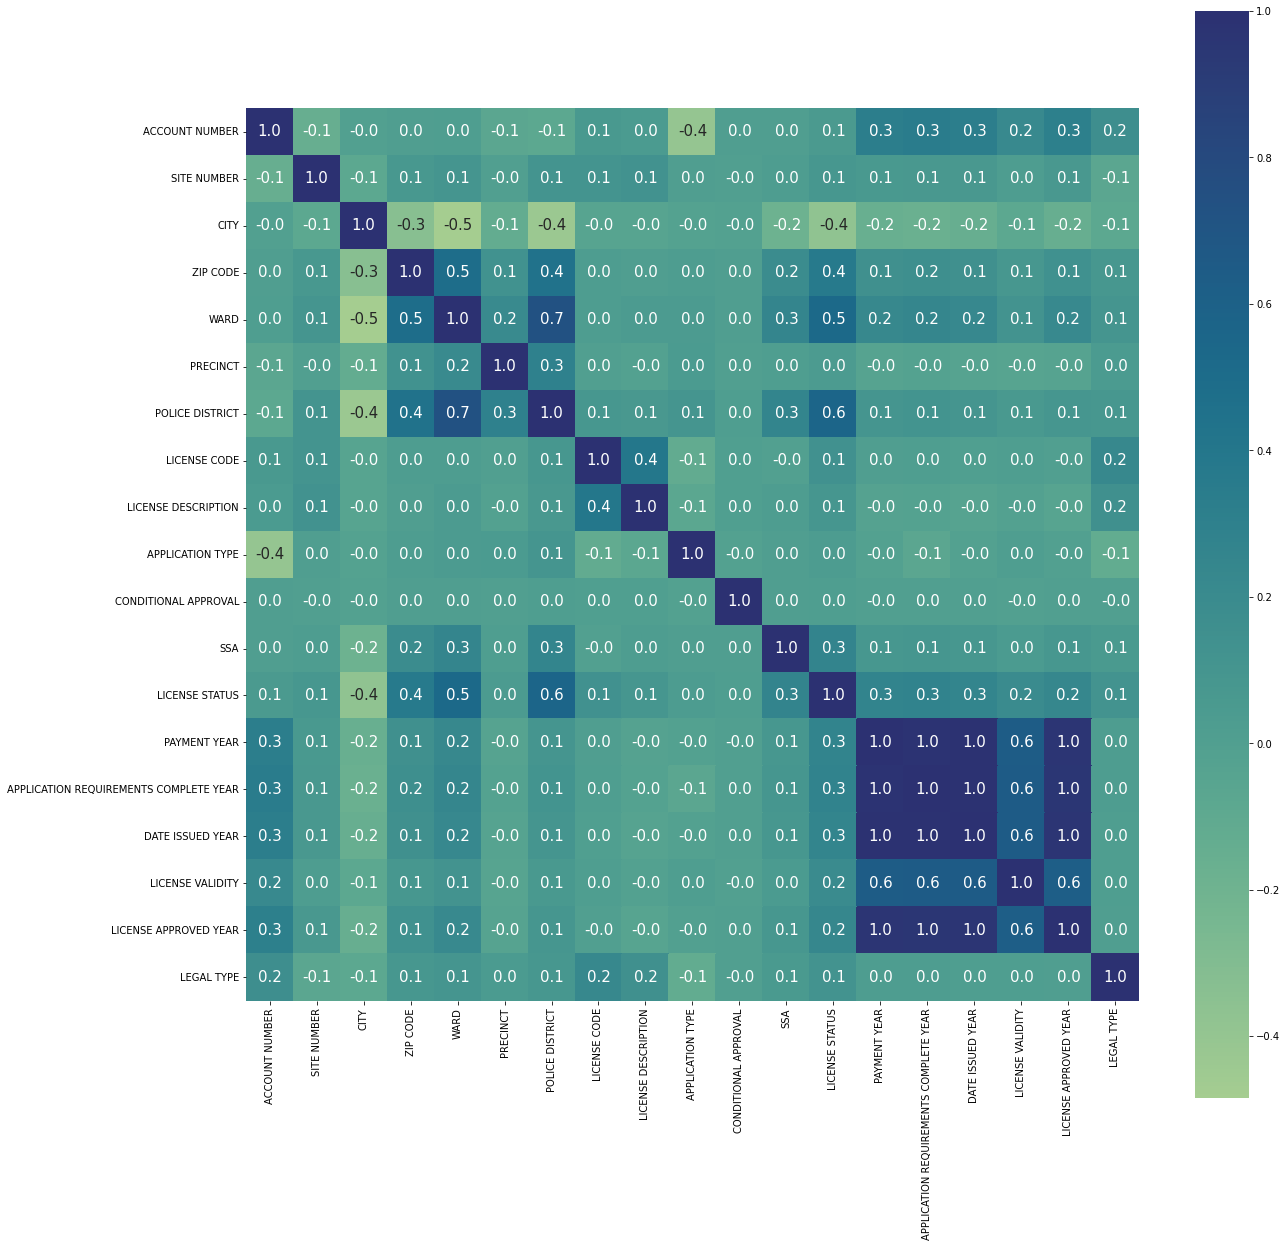

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='crest')
plt.show()

In [ ]:
X=train.drop(['LICENSE STATUS'], axis = 1)
y=train['LICENSE STATUS']

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train=train.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df=train[train['LICENSE STATUS'] == 4]
pending_df=train[train['LICENSE STATUS'] == 3]
accepted_df=train[train['LICENSE STATUS'] == 2]

non_fraud_df=train[train['LICENSE STATUS'] == 1][:600]
non_accepted_df=train[train['LICENSE STATUS'] == 0][:1000]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
10759,15382,2,129,1435,0.0,0.0,0.0,1010,41,4,0,0.0,0,2007.0,2006.0,2007,2.0,2007.0,0
27154,34483,1,193,1575,22.0,0.0,10.0,1010,41,4,0,0.0,1,2007.0,2002.0,2002,2.0,2002.0,1
61594,247772,1,151,1283,0.0,0.0,0.0,1010,41,4,0,0.0,0,2007.0,2006.0,2007,1.0,2007.0,4
6577,51321,3,402,1014,0.0,0.0,0.0,1046,9,4,0,0.0,0,2006.0,2005.0,2006,1.0,2006.0,0
81017,37302,1,193,1528,25.0,13.0,12.0,1010,41,4,0,0.0,1,2003.0,2002.0,2003,1.0,2003.0,4


In [ ]:
new_df['LICENSE STATUS'].value_counts()

0    1000
1     600
2     290
3       3
4       2
Name: LICENSE STATUS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


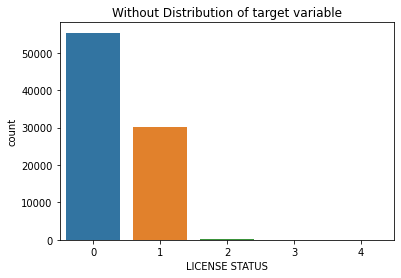

In [ ]:
plt.title('Without Distribution of target variable')
sns.countplot(train['LICENSE STATUS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


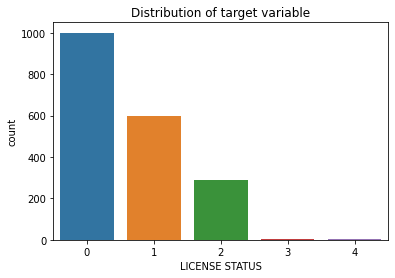

In [ ]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

# **Logistic Regression** 

In [ ]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Calculating cross validation score
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(logreg, X_train, y_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy', acc_logreg )

Accuracy 76.26


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[10755  3017     0     0]
 [ 2012  5622     0     0]
 [   10    57     0     0]
 [    0     1     0     0]]


#**NAIVE BAYES** 

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  60.13


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[11527   840  1386    19]
 [ 1282  1322  4974    56]
 [    0     2    64     1]
 [    0     0     1     0]]


#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters={'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
# Run the grid search 

grid_S=GridSearchCV(DecisionTreeClassifier(), parameters)
grid_S=grid_S.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_S.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=3)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[12928   844     0     0]
 [  639  6987     8     0]
 [    1    54    12     0]
 [    0     1     0     0]]


In [ ]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )


Total Accuracy :  92.8


#**K - Nearest Neighbors**

In [ ]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


# Create a KNN Classifier
knn = KNeighborsClassifier()
# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [ ]:
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  90.21


#**XGBoost**

In [ ]:
# Import library of xgboost model
from xgboost import XGBClassifier

# Create a XGB Classifier
# gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
#                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)
gbm = XGBClassifier()

# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = gbm.predict(X_test)


In [ ]:
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  93.07


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[12909   863     0     0]
 [  564  7068     2     0]
 [    1    58     8     0]
 [    0     1     0     0]]


#**SVM Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[12786   986     0     0]
 [  851  6783     0     0]
 [    1    66     0     0]
 [    0     1     0     0]]


In [ ]:
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  91.13


#**Random Forest**

In [ ]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )


Total Accuracy :  93.45


#Evaluation and comparision of all the models



In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'K - Nearest Neighbors', 'Random Forest', 'XGBoost','Support Vector Machines' ],
    'Score':[acc_logreg, acc_nb, acc_dt, acc_knn, acc_rf, acc_xgb,acc_svm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,93.45
5,XGBoost,93.07
2,Decision Tree,92.80
6,Support Vector Machines,91.13
3,K - Nearest Neighbors,90.21
0,Logistic Regression,76.26
1,Naive Bayes,60.13


#PRediction

In [ ]:
# Predicting on the test dataset
my_pred = rf.predict(test.values)

In [ ]:
my_submission.shape

(57239, 1)

In [ ]:
my_submission['LICENSE STATUS'] = my_pred

In [ ]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [ ]:
# Saving predictions to file
my_submission.to_csv('submission.csv', index=False)